In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from scipy.stats import describe
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
pwd

'C:\\Users\\Admin'

In [3]:
df = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

In [4]:
df

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [5]:
df.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [7]:
df.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [15]:
df.dropna(subset=['Price'], inplace=True)

In [16]:
df.isnull().sum()

Unnamed: 0     0
Address        0
Zip            0
Price          0
Area           0
Room           0
Lon            0
Lat            0
Price Range    0
dtype: int64

Data Visualising

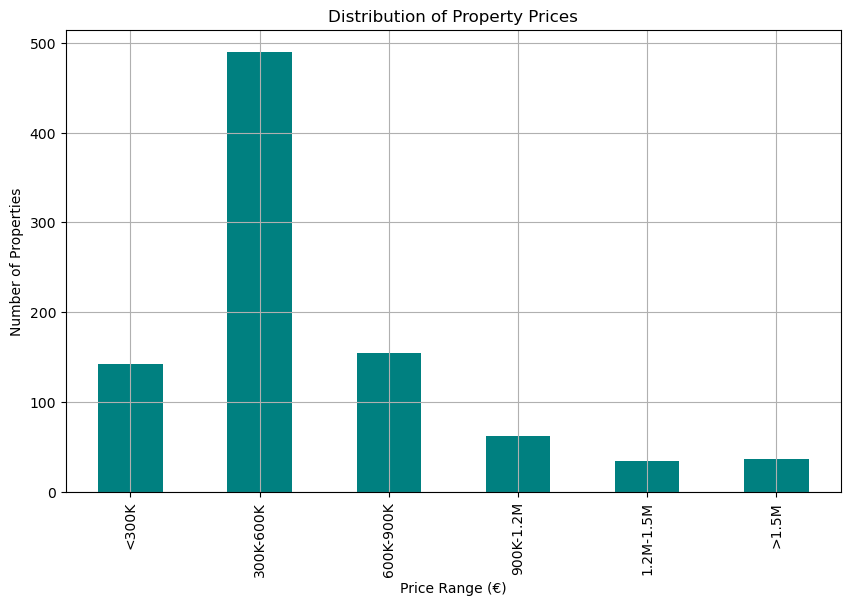

In [17]:

def plot_price_distribution(df):
    """
    Plots the distribution of property prices based on predefined price ranges.
    """
    # Define price ranges
    bins = [0, 300000, 600000, 900000, 1200000, 1500000, df['Price'].max()]
    labels = ['<300K', '300K-600K', '600K-900K', '900K-1.2M', '1.2M-1.5M', '>1.5M']
    df['Price Range'] = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest=True)

    # Plotting the bar chart
    price_range_counts = df['Price Range'].value_counts(sort=False)
    plt.figure(figsize=(10, 6))
    price_range_counts.plot(kind='bar', color='teal')
    plt.title('Distribution of Property Prices')
    plt.xlabel('Price Range (€)')
    plt.ylabel('Number of Properties')
    plt.grid(True)
    plt.show()

plot_price_distribution(df)



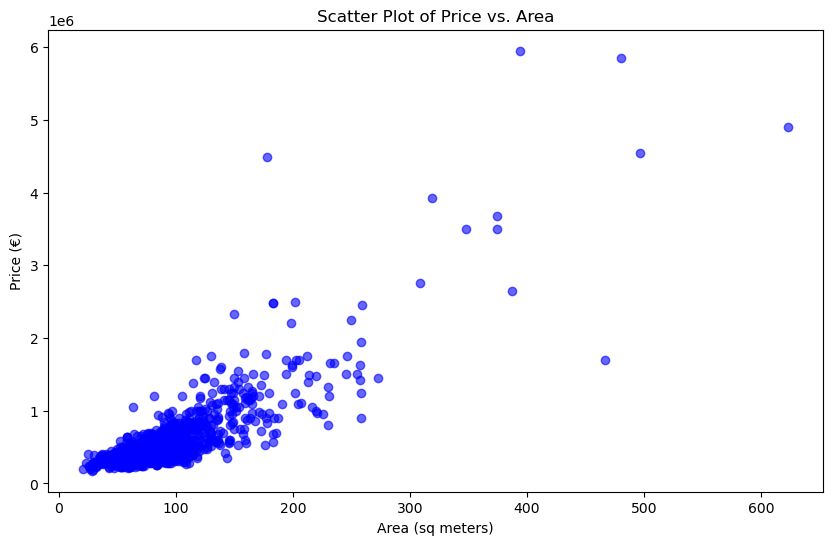

In [18]:
def plot_scatter_price_vs_area(df):
    """
    Plots a scatter plot of Price vs. Area for Amsterdam properties considering
     the 'Area' and 'Price' columns.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Area'], df['Price'], alpha=0.6, color='blue')
    plt.title('Scatter Plot of Price vs. Area')
    plt.xlabel('Area (sq meters)')
    plt.ylabel('Price (€)')
    
    plt.show()
plot_scatter_price_vs_area(df)


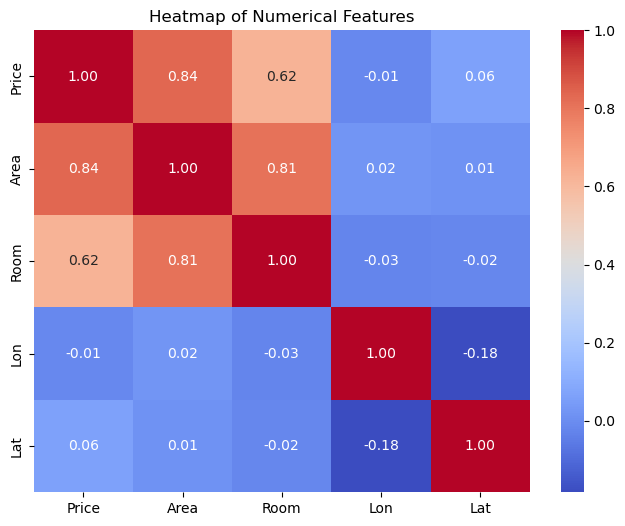

In [19]:

def plot_correlation_heatmap(df):
    """
    Plots a heatmap of the correlation matrix for numerical features.

    """
    corr_matrix = df[['Price', 'Area', 'Room', 'Lon', 'Lat']].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Heatmap of Numerical Features')
    plt.show()
plot_correlation_heatmap(df)



Using the Elbow Method we calculate the ideal number of clusters

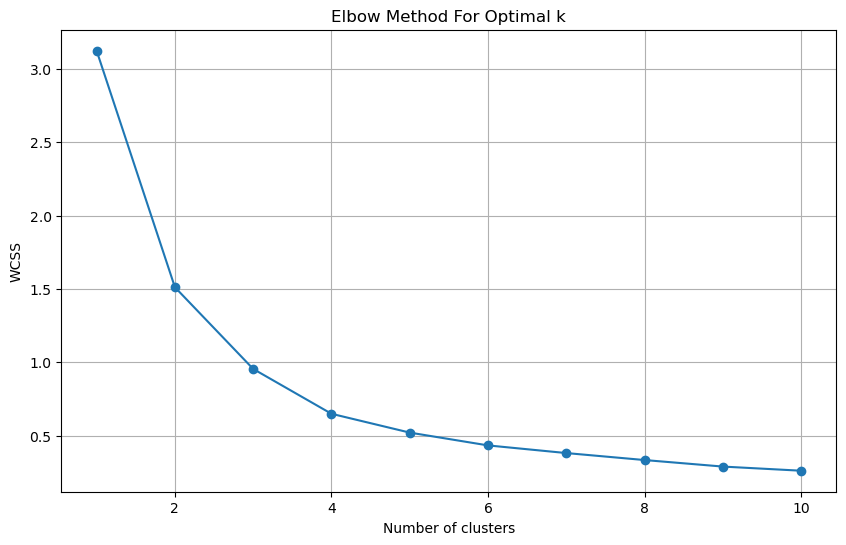

In [20]:

coords = df[['Lon', 'Lat']]

def plot_elbow_curve(coords):
    """
    Plots the elbow curve to determine the optimal number of clusters using the KMeans algorithm.

    """
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(coords)
        wcss.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')  
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()

plot_elbow_curve(coords)


Using the above elbow method we now see the clustering performed on geographic location

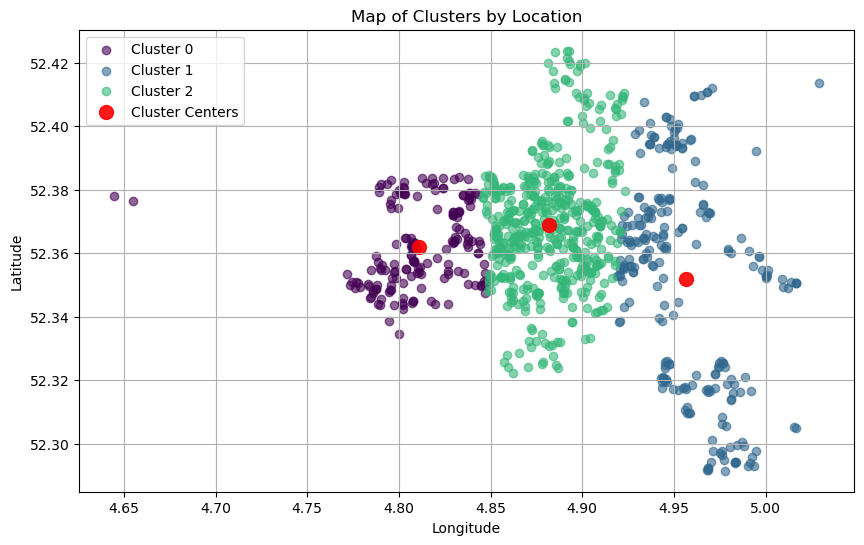

In [22]:
def plot_clusters_on_map(df, coords, num_clusters=3):
    """
    Plots clusters on a map based on latitude and longitude coordinates using the KMeans algorithm.
    """
    # KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(coords)
    centers = kmeans.cluster_centers_

    plt.figure(figsize=(10, 6))

    # Plot data points and cluster centers
    for label in np.unique(cluster_labels):
        plt.scatter(df.loc[cluster_labels == label, 'Lon'], df.loc[cluster_labels == label, 'Lat'], 
                    c=[plt.cm.viridis(label / num_clusters)], marker='o', alpha=0.6, 
                    label=f'Cluster {label}')  # Data points
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9, label='Cluster Centers')  # Cluster centers
    
    plt.title('Map of Clusters by Location')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_clusters_on_map(df, coords)


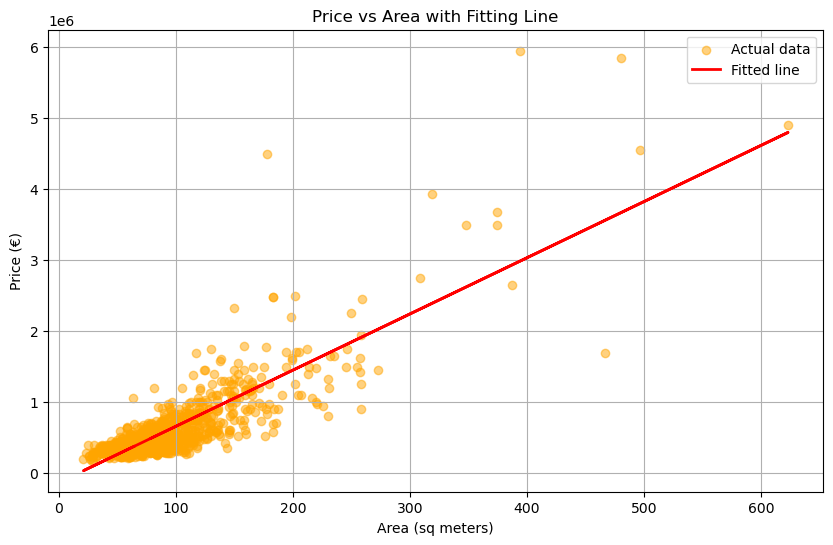

In [23]:
def plot_scatter_with_fit(df):
    """ 
    Plots a scatter plot of Price vs. Area and fits a linear regression line.
    
    """
    
    # Fitting the linear regression 
    X = df['Area'].values.reshape(-1, 1)
    y = df['Price'].values 
    model = LinearRegression() 
    model.fit(X, y) 
    y_pred = model.predict(X) 
    
    plt.figure(figsize=(10, 6)) 
    plt.scatter(X, y, color='orange', alpha=0.5, label='Actual data')
    plt.plot(X, y_pred, color='red', linestyle='-', linewidth=2, label='Fitted line')
    plt.title('Price vs Area with Fitting Line') 
    plt.xlabel('Area (sq meters)')
    plt.ylabel('Price (€)')
    plt.legend() 
    plt.grid(True)
    plt.show() 
    
    slope = model.coef_[0] 
    intercept = model.intercept_ 
    
# Dropping null values in the 'Price' column
df.dropna(subset=['Price'], inplace=True)

plot_scatter_with_fit(df)


In [25]:

X = df[['Area', 'Room', 'Lon', 'Lat']]
y = df['Price']

model = LinearRegression()

# Fit the model to the data
model.fit(X, y)


LinearRegression()

In [26]:
# Predictions
predictions = model.predict(X)

# R-squared score
r2 = r2_score(y, predictions)
print(f"R-squared: {r2:.2f}")

# Mean Absolute Error
mae = mean_absolute_error(y, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# Mean Squared Error
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")


R-squared: 0.71
Mean Absolute Error: 179003.75
Mean Squared Error: 84729261714.53
Root Mean Squared Error: 291082.91
